# Replicates Figs 4, D, and E. And, Tables A and B.

### Importing useful functions

In [1]:
###### 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.pylab import *
import pickle
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from copy import copy

global resol, thresh

In [2]:
thresh=0 #mV
resol=0.01#ms (min resolution of integration)


In [3]:
######Importing useful functions
exec(open("./functions/f_stimulations_simulations.py").read())
exec(open("./functions/f_plots.py").read())
exec(open("./functions/f_saving_plots.py").read())
exec(open("./functions/f_post_simulation_analysis.py").read())


In [4]:
####### This part is needed just to give a neuron structure to the generation of sim_exp (the specific model is completely irrelevant)
#Model to Analyze
s_model_abrev="MTM_W_sPNaS_sICD"
s_model="neuron_"+s_model_abrev
exec(open("./cfg/m_"+s_model_abrev+".py").read())
d_Pars=eval("Pars_"+s_model_abrev)
# #######Importing model to be used########
identifier = getattr(sys.modules[__name__], s_model)
# ############ Creating neuron
d_Pars_copy=copy(d_Pars)
neuron=identifier(d_Pars_copy)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


2.7187500000000004
3 nA spike train recovery Copy
0.309375
Test of Na channel inactivation Copy


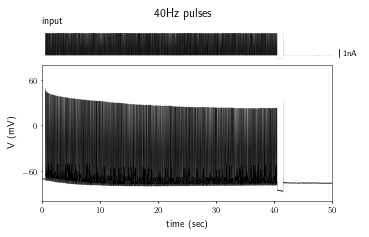

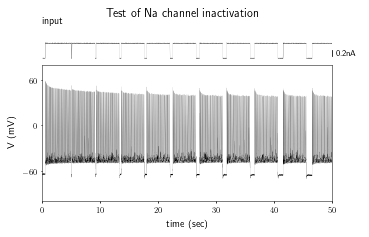

In [18]:
### Figure properties
matplotlib.rcParams['lines.linewidth']=0.065
fig_wide=matplotlib.rcParams["figure.figsize"][0]
fig_height=matplotlib.rcParams["figure.figsize"][1]

###################SpikeAmplitudeDecay_#####################################################
########################################################################
################ 1 example Figure with 40Hz depolarizations & 1 example Figure with hyperpolarizations  ####################
##########################################################################
#########################################################################
dir_exps='./Data/Recordings/SpikeAmplitude/'
i_s_cell='SpikeAmplitudeExps0_modern'

import matplotlib.cm as cm
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error


######################## Loading cell Dictionary ##############################
cell=str(i_s_cell)
f=open(dir_exps+cell+'.pk1', 'rb')
d_Cell=pickle.load(f, encoding='latin1')
f.close()

for s_descpt in d_Cell.keys():
    if d_Cell[s_descpt]!={}:
        if len(d_Cell[s_descpt]['s_vars'])==3:
            c_s=0
            for s_var in d_Cell[s_descpt]['s_vars']:
                if 'Time' in s_var:
                    v_t=d_Cell[s_descpt]['a_vars'][:,c_s]*1000#s To ms
                if 'Voltage' in s_var or 'Vm' in s_var:
                    v_V=d_Cell[s_descpt]['a_vars'][:,c_s]*1000#to mV
                if 'Current' in s_var or 'Im' in s_var:
                    v_Iapp=d_Cell[s_descpt]['a_vars'][:,c_s]*1e9-0.3
                c_s+=1
            neuron.noisy_current=v_Iapp
            sim_exp=organizing_experimentalData(neuron,v_t,v_V)
            sp_ampl,sp_V_max,sp_V_min=extract_spike_ampl(sim_exp.a_Results.V, sim_exp.fr[2])
            sim=sim_exp
            sp_ampl,sp_V_max,sp_V_min=extract_spike_ampl(sim_exp.a_Results.V, sim_exp.fr[2])
            if 'inactivation' in s_descpt:
                f0=fancy_fig_4_stimulation(sim,title=s_descpt[0:s_descpt.index('Copy')],add_scale=[0.2,'0.2nA'])
                print(max(sim.c_neuron.noisy_current))
                md_dir={
                        'Title':'Experimental trace'+i_s_cell+ ' Small hyperpolarizing pulses',
                        'Author':"Susana Contreras 27/07/2018",
                        'Subject':'Spike amplitude ',
                        'Keywords':"Na dynamic concentration, Na-K-Pump, dependent excitability, adaptation"
                        }
                fig_file_title='SpikeAmplitudeDecay_'+i_s_cell+'_hyperPol_pulses_vthesis'
                print(s_descpt)
            else:
                f0=fancy_fig_4_stimulation(sim,title='40Hz pulses',add_scale=[1,'1nA'])
                print(max(sim.c_neuron.noisy_current))
                md_dir={
                        'Title':'Experimental trace'+i_s_cell+ ' 40Hz Depolarizing pulses',
                        'Author':"Susana Contreras 27/07/2018",
                        'Subject':'Spike amplitude ',
                        'Keywords':"Na dynamic concentration, Na-K-Pump, dependent excitability, adaptation"
                        }
                fig_file_title='SpikeAmplitudeDecay_'+i_s_cell+'_40Hz_DepolPulses'
                print(s_descpt)
            

In [6]:
########################################################################
########################################################################
################ Stats for all groups 40Hz pulses  ####################
##########################################################################
#########################################################################
dir_exps='./Data/Recordings/SpikeAmplitude/'

import matplotlib.cm as cm
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
######################## Loading cell Dictionary ###############################
dt_pool=['40Hz_Group_1','40Hz_Group_2']
arr_fit=[]
for i_s_cell in dt_pool:
    cell=str(i_s_cell)
    f=open(dir_exps+cell+'.pk1', 'rb')
    d_Cell=pickle.load(f, encoding='latin1')
    for i_which_cell in range(len(d_Cell.keys())):
        s_Cell=list(d_Cell.keys())[i_which_cell]
        if s_Cell!='s_name':
            for s_iExp in d_Cell[s_Cell].keys():
                i_Exp=d_Cell[s_Cell][s_iExp]
                c_s=0
                for s_var in i_Exp['s_vars']:
                    if 'Time' in s_var or '(s))' in s_var:
                        v_t=i_Exp['a_vars'][:,c_s]*1000#s To ms
                    if 'Voltage' in s_var or 'Vm' in s_var:
                        v_V=i_Exp['a_vars'][:,c_s]*1000#to mV
                    if 'Current' in s_var or 'Im' in s_var:
                        v_Iapp=i_Exp['a_vars'][:,c_s]*10e9-0.3
                    c_s+=1
            neuron.noisy_current=v_Iapp
            sim_exp=organizing_experimentalData(neuron,v_t,v_V)
            sim=sim_exp
            sp_ampl,sp_V_max,sp_V_min=extract_spike_ampl(sim_exp.a_Results.V, sim_exp.fr[2][0:-1])
            try:
                tad, popt,tpeak,perr=doub_expon_fit_2(v_t[sim_exp.fr[2][0:-1]],sp_V_max,std_error=True)
                mqe=mean_squared_error(sp_V_max[len(sp_V_max)-len(doub_expon_fun_2(tad,*popt)):], doub_expon_fun_2(tad,*popt))
                c=0
                while c < 4 and mqe>1.5:
                    print('Trying improvement!')
                    poptx=popt
                    poptx[0]=popt[0]/10
                    tad, popt,tpeak,perr=doub_expon_fit_2(v_t[sim_exp.fr[2][0:-1]],sp_V_max,p=poptx,std_error=True)
                    mqe=mean_squared_error(sp_V_max[len(sp_V_max)-len(doub_expon_fun_2(tad,*popt)):], doub_expon_fun_2(tad,*popt))
                    c+=1

                print('Fast tau= '+ str(popt[0]))
                print('Slow tau= '+ str(popt[1]))
                print('Ratio Fast slow= '+ str(popt[2]/popt[3]))
                arr_fit.append([list(popt)+list(perr)+[mqe]+[s_Cell]])

            except Exception as e:
                print(s_Cell +' Failed because: '+str(e))
                arr_fit.append([[nan for iii in range(11)]+[s_Cell]])
                pass




/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 355.17241302531386
Slow tau= 22304.006095828543
Ratio Fast slow= 0.32429144086586464


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 1060.3178940175176
Slow tau= 14165.290120479722
Ratio Fast slow= 1.0006006006078538e-07


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 366.388687170984
Slow tau= 17257.730719812
Ratio Fast slow= 0.14188607537156525


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 83.94246294497044
Slow tau= 11541.945823468299
Ratio Fast slow= 0.2518113207194139


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 178.0745099120584
Slow tau= 10683.859493985956
Ratio Fast slow= 0.4252686278564513


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 496.3726647858268
Slow tau= 12667.613136489836
Ratio Fast slow= 0.16879794968355982


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 3688.3982064675256
Slow tau= 94258.65363997004
Ratio Fast slow= 0.23743033747915035


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Trying improvement!
Trying improvement!
Trying improvement!
Trying improvement!
Fast tau= 78.68609092697507
Slow tau= 55268.610329635434
Ratio Fast slow= 0.11064021606642215


/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning

Fast tau= 251.52669272555067
Slow tau= 30154.40298425932
Ratio Fast slow= 0.3953145235744133


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 160.06995409384103
Slow tau= 10802.475606521784
Ratio Fast slow= 0.4797095255371057


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 3663.2065728787925
Slow tau= 37290.8584656668
Ratio Fast slow= 0.21612802333265235


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 256.4206195646063
Slow tau= 14626.904229391988
Ratio Fast slow= 0.2481044820523987


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 469.6783513858691
Slow tau= 17181.99806037583
Ratio Fast slow= 0.18378517565679697


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 221.50908005719796
Slow tau= 15898.562210698303
Ratio Fast slow= 0.16710582139818694


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 2371.165752395139
Slow tau= 5085.075793951244
Ratio Fast slow= 7.292344673741984e-08


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 476.9660836299085
Slow tau= 18907.683758193227
Ratio Fast slow= 0.26001390825723564


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 126.84663360675769
Slow tau= 9616.42528481818
Ratio Fast slow= 0.3433636796077955


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Trying improvement!
Trying improvement!
Trying improvement!
Trying improvement!
Fast tau= 78.5002973797842
Slow tau= 63768.619672510875
Ratio Fast slow= 0.29879187906397514


/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 209.93566741863847
Slow tau= 34280.71357980866
Ratio Fast slow= 0.23168054254100431


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


A171218M Failed because: max() arg is an empty sequence
Trying improvement!
Trying improvement!
Trying improvement!
Trying improvement!
Fast tau= 0.018101049867034296
Slow tau= 23140.879624613895
Ratio Fast slow= 0.05879761478977413


/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object o

Fast tau= 182.92374343982337
Slow tau= 11775.39819043236
Ratio Fast slow= 0.3915618657997295


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 2163.3709102665152
Slow tau= 37898.91740780164
Ratio Fast slow= 0.3275353116969177


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Trying improvement!
Trying improvement!
Trying improvement!
Trying improvement!
Fast tau= 72.13243022501443
Slow tau= 174162852286363.72
Ratio Fast slow= 3058.2192720499256


/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covaria

Trying improvement!
Trying improvement!
Trying improvement!
Trying improvement!
Fast tau= 172.3277768734306
Slow tau= 6146.3503519660535
Ratio Fast slow= 0.45426659161756383


/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Trying improvement!
Trying improvement!
Trying improvement!
Trying improvement!
Fast tau= 444.90075177568053
Slow tau= 34229.19303880455
Ratio Fast slow= 0.3585924313623662


/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning

Trying improvement!
Trying improvement!
Trying improvement!
Trying improvement!
Fast tau= 2.7027021893685247e-06
Slow tau= 296387341648.86
Ratio Fast slow= 42572.431637987764
Fast tau= 61.49429215718686
Slow tau= 18578.103808234046
Ratio Fast slow= 0.11444319326341226


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 178.44820750868968
Slow tau= 25065.15162345536
Ratio Fast slow= 0.25860588817844155


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Trying improvement!
Trying improvement!
Trying improvement!
Trying improvement!
Fast tau= 0.08907695573686099
Slow tau= 83578.40661053239
Ratio Fast slow= 0.9988310912971493


/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object o

Fast tau= 1150.7421551215486
Slow tau= 19530.418840644095
Ratio Fast slow= 0.13878127450752914


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 141.9871092123704
Slow tau= 15524.996943103211
Ratio Fast slow= 0.26186914206114914


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 231.2472896823294
Slow tau= 11609.726701047352
Ratio Fast slow= 0.39593915338619706


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 334.6830595598295
Slow tau= 10772.479246251
Ratio Fast slow= 0.6175069943871558


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 3054.8023823187827
Slow tau= 44290.86434479258
Ratio Fast slow= 0.44515342634822364


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 234.1791020616161
Slow tau= 20907.499787891633
Ratio Fast slow= 0.22817136783656314


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 97.99434224844609
Slow tau= 11540.13801798011
Ratio Fast slow= 0.2577801773629288


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Trying improvement!
Trying improvement!
Trying improvement!
Trying improvement!
Fast tau= 0.027348184860427845
Slow tau= 58744.965182936765
Ratio Fast slow= 0.8850296280839014


/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object o

Trying improvement!
Trying improvement!
Trying improvement!
Trying improvement!
Fast tau= 141.0693371455914
Slow tau= 26134.191032117385
Ratio Fast slow= 0.25496998443776353


/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 864.0876022171589
Slow tau= 19930.95903534917
Ratio Fast slow= 0.16944349022709132


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


A171219D Failed because: doub_expon_fun_2() missing 5 required positional arguments: 'tau1', 'tau2', 'a', 'b', and 'c'
Fast tau= 151.40663491966754
Slow tau= 13963.556624917219
Ratio Fast slow= 0.16525581101797193


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 273.85373267406925
Slow tau= 19299.439350376964
Ratio Fast slow= 0.4772089934159511


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 190.23268760490464
Slow tau= 20388.679439919673
Ratio Fast slow= 0.4691186201371811


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 100.65407959585214
Slow tau= 12144.062794043744
Ratio Fast slow= 0.1484135307322459


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 257.1657722565231
Slow tau= 22003.858733761117
Ratio Fast slow= 0.34344663108867735


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 1916.6558824652705
Slow tau= 14219.433976332806
Ratio Fast slow= 0.45310917665310174


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 214.35603100780648
Slow tau= 13726.038257978427
Ratio Fast slow= 0.37319871267679716


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


A171212E Failed because: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Trying improvement!
Trying improvement!
Trying improvement!
Trying improvement!
Fast tau= 0.015255348552196346
Slow tau= 42742.07096531062
Ratio Fast slow= 0.12684067341022318


/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object o

Trying improvement!
Trying improvement!
Fast tau= 15155.396151874203
Slow tau= 662.6940350254025
Ratio Fast slow= 6.457184816778418


/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 680.9741531598639
Slow tau= 9540.79892317879
Ratio Fast slow= 0.3194199453189148


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 186.9432368535297
Slow tau= 18832.75740327516
Ratio Fast slow= 0.28705085188513735


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


A171220F Failed because: max() arg is an empty sequence
Fast tau= 79.155509382785
Slow tau= 11339.071798466952
Ratio Fast slow= 0.20995116388190743


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 342.87045592263706
Slow tau= 23012.306182991764
Ratio Fast slow= 0.29820770959583703


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 99.28018199251234
Slow tau= 25166.124843653135
Ratio Fast slow= 0.32154413562917705


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Trying improvement!
Trying improvement!
Trying improvement!
Trying improvement!
Fast tau= 90.71111727767128
Slow tau= 9577.203887158696
Ratio Fast slow= 0.34831826741895705


/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 409.41911256984764
Slow tau= 13616.337574825855
Ratio Fast slow= 0.28465907671891943


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 266.9112411762768
Slow tau= 14969.28468727315
Ratio Fast slow= 0.4303919171946258


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 147.2908109626872
Slow tau= 4312.108482240693
Ratio Fast slow= 0.6862719767321637


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 292.37422095380333
Slow tau= 18717.267708626146
Ratio Fast slow= 0.29105831542187655


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 1907.009189620777
Slow tau= 233813.26499614198
Ratio Fast slow= 0.20010404894882536


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 203.80865255938707
Slow tau= 24169.87441775654
Ratio Fast slow= 0.645622652334997


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 207.0073283341247
Slow tau= 20825.732937033055
Ratio Fast slow= 0.3266583771016809


/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Fast tau= 339.4230612050146
Slow tau= 16882.345245497057
Ratio Fast slow= 0.31246484634685484


In [7]:
df_dirty = pd.DataFrame(columns=['$\\tau_{fast}$','$\\tau_{slow}$','$D_{fast}$','$D_{slow}$','$D_{ss}$','$ste_{tau_{fast}}$','$ste_{tau_{slow}}$','$ste_{D_{fast}}$','$ste_{D_{slow}}$','$ste_{D_{ss}}$','Mean Squared error','Cell label'], data=np.concatenate(arr_fit))
df=df_dirty[~df_dirty.isin([np.nan, np.inf, -np.inf, NaN]).any(1)]
cols = df.columns.drop('Cell label')
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
#### Selecting subsample of data that is free of artifacts***
cond_fitable=(df['Mean Squared error']<2.0)*(df['Cell label']!='A171212A')*(df['Cell label']!='A171220J')*(df['Cell label']!='A171214G')

df_st=df[cond_fitable]
# df_st.to_pickle("./Data/Metadata/ParDistFit_DoubExpon_SpikeAmplitudeDecay_from_"+dt_pool[0]+'_and_'+dt_pool[1]+"_40Hz_DepolPulses_df_to_plot_PLOS.pkl")
###### Portraying statistics
cols_fit=df.columns[0:5]
cols_ste=df.columns[5:10]
cols_msqe=df.columns[10]

/usr/lib/python3/dist-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


\begin{tabular}{lrrrrr}
\toprule
{} &  \$\textbackslash tau\_\{fast\}\$ &  \$\textbackslash tau\_\{slow\}\$ &  \$D\_\{fast\}\$ &  \$D\_\{slow\}\$ &   \$D\_\{ss\}\$ \\
\midrule
count &      48.000000 &      48.000000 &   48.000000 &   48.000000 &  48.000000 \\
mean  &     480.293768 &   17727.182536 &    5.906122 &   20.378979 &  23.529793 \\
std   &     676.423913 &    7916.840369 &    2.470177 &    6.366371 &  11.478177 \\
min   &      61.686976 &    4312.710113 &    0.000002 &    7.860144 &   0.000001 \\
25\%   &     170.353966 &   12050.396886 &    4.334064 &   17.144954 &  16.728523 \\
50\%   &     232.372736 &   16797.597198 &    5.823583 &   20.102315 &  23.596663 \\
75\%   &     368.297484 &   21156.877409 &    7.097274 &   22.357364 &  30.930222 \\
max   &    3082.960911 &   45774.557501 &   14.305466 &   48.164288 &  59.708845 \\
\bottomrule
\end{tabular}



/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


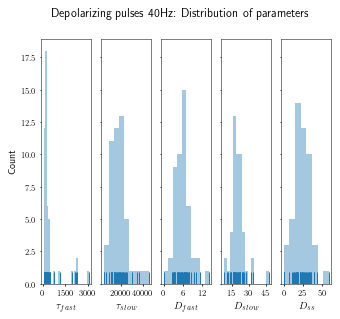

In [8]:
import pandas as pd
dt_pool=['40Hz_Group_1', '40Hz_Group_2']
df_st = pd.read_pickle("./Data/Metadata/ParDistFit_DoubExpon_SpikeAmplitudeDecay_from_"+dt_pool[0]+'_and_'+dt_pool[1]+"_40Hz_DepolPulses_df_to_plot.pkl")

###### Portraying statistics
cols_fit=df_st.columns[0:5]
cols_ste=df_st.columns[5:10]
cols_msqe=df_st.columns[10]

fig, axes = plt.subplots(ncols=len(cols_fit),sharey=True,facecolor="1",figsize=(fig_wide,fig_height))
for ax, col in zip(axes, df_st[cols_fit].columns):
    sns.distplot(df_st[col], ax=ax, rug=True, kde=False, hist=True, norm_hist=False)
    locatory2 = MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
    ax.xaxis.set_major_locator(locatory2)
    del locatory2

axes[0].set_ylabel('Count')
fig.suptitle('Depolarizing pulses 40Hz: Distribution of parameters')
fig.show()

print(df_st[cols_fit].describe().to_latex())#### To generate latex table of Stat analysis

In [9]:
########################################################################
########################################################################
################ Stats for all groups Hyperpol pulses  ####################
##########################################################################
#########################################################################
dir_exps='./Data/Recordings/SpikeAmplitude/'

import matplotlib.cm as cm
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
######################## Loading cell Dictionary ###############################
dt_pool=['DC_current_Group_1','DC_current_Group_2']
arr_fit_fast=[]
arr_fit_slow=[]
arr_fit_data_prot=[]
arr_raw_data=[]
for i_s_cell in dt_pool:
    cell=str(i_s_cell)
    f=open(dir_exps+cell+'.pk1', 'rb')
    d_Cell=pickle.load(f, encoding='latin1')
    for i_which_cell in range(len(d_Cell.keys())):
        s_Cell=list(d_Cell.keys())[i_which_cell]
        if s_Cell!='s_name':
            for s_iExp in d_Cell[s_Cell].keys():
                i_Exp=d_Cell[s_Cell][s_iExp]
                c_s=0
                for s_var in i_Exp['s_vars']:
                    if 'Time' in s_var or '(s))' in s_var:
                        v_t=i_Exp['a_vars'][:,c_s]*1000#s To ms
                    if 'Voltage' in s_var or 'Vm' in s_var:
                        v_V=i_Exp['a_vars'][:,c_s]*1000#to mV
                    if 'Current' in s_var or 'Im' in s_var:
                        v_Iapp=i_Exp['a_vars'][:,c_s]*10e9-0.3
                    c_s+=1
            ### Smoothing v_Iapp..
            neuron.noisy_current=v_Iapp
            sim_exp=organizing_experimentalData(neuron,v_t,v_V)
            sim=sim_exp
            sp_ampl,sp_V_max,sp_V_min=extract_spike_ampl(sim_exp.a_Results.V, sim_exp.fr[2])
            ## Start of spiking/ per interval in between hyperpol
            st_i=np.nonzero((v_Iapp[0:-1]<0) & (v_Iapp[1:]>0) & (diff(v_Iapp>=0,n=1)>0))[0]
            ## End of spiking/ per interval in between hyperpol
            end_i=np.nonzero((v_Iapp[0:-1]>0) & (v_Iapp[1:]<0) & (diff(v_Iapp<=0,n=1)>0))[0]
            ## Hyperpol duration
            v_hyperpol_dur=[v_t[st_i][c] - v_t[end_i[c-1]] for c in range(1,len(st_i))]
            ## Delta smallV
            V_st=[[sp_V_max[ii] for ii in range(len(sim_exp.fr[2])) if v_t[sim_exp.fr[2][ii]]>v_t[st_i][jj]][0] if len([sp_V_max[ii] for ii in range(len(sim_exp.fr[2])) if v_t[sim_exp.fr[2][ii]]>v_t[st_i][jj]])>2 else nan for jj in range(len(st_i)) ]## Selecting 1st spike
            V_nd=[[sp_V_max[ii] for ii in range(len(sim_exp.fr[2])) if v_t[sim_exp.fr[2][ii]]<v_t[st_i][jj]][-1] for jj in range(len(st_i))[1:]]
            Fr_nd=[[sim_exp.fr[1][ii] for ii in range(len(sim_exp.fr[1])) if v_t[sim_exp.fr[2][ii]]<v_t[st_i][jj]][-1] for jj in range(len(st_i))[1:]]
            try:
                Fr_nd=np.concatenate(Fr_nd)
            except:
                pass
            V_delta_Vfast=[V_st[iii+1]-V_nd[iii] for iii in range(len(V_nd))]
            V_fast_VsiniSpike=[V_st[iii+1]/V_st[0] for iii in range(len(V_nd))]
            V_delta_Vfast_percent=[(V_st[iii+1]-V_nd[iii])/(V_st[0]-V_nd[iii]) for iii in range(len(V_nd))]
            V_delta_VSlow=[V_nd[0]-V_nd[iii] for iii in range(len(V_nd))]###Ignoring the fast initial portion of spike inactivation
            V_slow_VsiniSpike=[V_nd[iii]/V_st[0] for iii in range(len(V_nd))]
            t_delta_VSlow=v_t[end_i]
            try:
                V_delta_Vslow_percent=V_delta_VSlow/V_delta_VSlow[-1]
            except:
                V_delta_Vslow_percent=V_delta_VSlow
                pass

            pop_fit=[]
            perr_v=[]
            tad_fit=[]
            tpeak_fit=[]
            data_fit=sp_V_max
            y_data_fit_v=[]
            t_data_fit_v=[]
            arr_fit_ii=[]
            smqe=[]
            try:
                V_tt=[[v_t[sim_exp.fr[2][ii]] for ii in range(len(sim_exp.fr[2])) if v_t[sim_exp.fr[2][ii]]>v_t[st_i][jj]][2] for jj in range(len(st_i))]
                c=0
                for i_st in st_i:
                    try:
                        if c<len(st_i)-1:
                            y_data_fit_i=[data_fit[i] for i in range(len(sim_exp.fr[2])) if v_t[sim_exp.fr[2]][i]>=v_t[i_st] and v_t[sim_exp.fr[2]][i]<v_t[end_i[c]]]
                            y_data_fit_i=y_data_fit_i[0:]## ignores first 2 spikes after dep pulse
                            t_data_fit_i=[v_t[sim_exp.fr[2][i]] for i in range(len(sim_exp.fr[2])) if v_t[sim_exp.fr[2]][i]>=v_t[i_st] and v_t[sim_exp.fr[2]][i]<v_t[end_i[c]]]
                            t_data_fit_i=t_data_fit_i[0:]## ignores first 2 spikes after dep pulse
                            y_data_fit_v.append(y_data_fit_i)
                            t_data_fit_v.append(t_data_fit_i)
                            tad_i, popt_i,tpeak_i,perr_i=doub_expon_fit_2(t_data_fit_i,y_data_fit_i,std_error=True)
                            mqe=mean_squared_error(y_data_fit_i[len(y_data_fit_i)-len(doub_expon_fun_2(tad_i,*popt_i)):], doub_expon_fun_2(tad_i,*popt_i))
                        elif c>=len(st_i)-1:
                            y_data_fit_i=[data_fit[i] for i in range(len(sim_exp.fr[2])) if v_t[sim_exp.fr[2]][i]>=v_t[i_st] ]
                            y_data_fit_i=y_data_fit_i[0:]## ignores first 2 spikes after dep pulse
                            t_data_fit_i=[v_t[sim_exp.fr[2][i]] for i in range(len(sim_exp.fr[2])) if v_t[sim_exp.fr[2]][i]>=v_t[i_st]]
                            t_data_fit_i=t_data_fit_i[0:]## ignores first 2 spikes after dep pulse
                            y_data_fit_v.append(y_data_fit_i)
                            t_data_fit_v.append(t_data_fit_i)
                            tad_i, popt_i,tpeak_i,perr_i=doub_expon_fit_2(t_data_fit_i,y_data_fit_i,std_error=True)
                            mqe=mean_squared_error(y_data_fit_i[len(y_data_fit_i)-len(doub_expon_fun_2(tad_i,*popt_i)):], doub_expon_fun_2(tad_i,*popt_i))

                        arr_fit_fast.append([list(popt_i)+list(perr_i)+[mqe]+[s_Cell]])
                        smqe.append(mqe)
                    except:
                        arr_fit_fast.append([[nan for iii in range(11)]+[s_Cell]])
                        popt_i=[]
                        perr_i=[]
                        tad_i=[]
                        tpeak_i=[]
                        y_data_fit_i=[]
                        t_data_fit_i=[]
                        pass
                    pop_fit.append(popt_i)
                    perr_v.append(perr_i)
                    tad_fit.append(tad_i)
                    tpeak_fit.append(tpeak_i)
                    c+=1
                mqe=[]
                try:
                    tad_all, popt_all,tpeak_all,perr_all=doub_expon_fit_2(np.concatenate(t_data_fit_v),np.concatenate(y_data_fit_v),std_error=True)
                    mqe=mean_squared_error(np.concatenate(y_data_fit_v)[len(np.concatenate(y_data_fit_v))-len(doub_expon_fun_2(tad_all,*popt_all)):], doub_expon_fun_2(tad_all,*popt_all))
                    arr_fit_slow.append([list(popt_all)+list(perr_all)+[mqe]+[s_Cell]])
                    arr_label_data=[s_Cell for iiij in range(len(np.concatenate(t_data_fit_v)))]
                    arr_raw_data.append([np.concatenate(t_data_fit_v),np.concatenate(y_data_fit_v),arr_label_data])
                except:
                    arr_fit_slow.append([[nan for iii in range(11)]+[s_Cell]])
                    pass
            except:
                arr_fit_slow.append([[nan for iii in range(11)]+[s_Cell]])
                arr_fit_fast.append([[nan for iii in range(11)]+[s_Cell]])
                pass
            arr_label=[s_Cell for iiij in range(len(V_delta_Vfast))]
            arr_fit_data_prot.append([v_hyperpol_dur,V_fast_VsiniSpike,V_slow_VsiniSpike,V_delta_Vfast,V_delta_Vfast_percent,t_delta_VSlow,V_delta_VSlow,V_delta_Vslow_percent,Fr_nd,arr_label])
            


df_slow = pd.DataFrame(columns=['$\\tau_{fast}$','$\\tau_{slow}$','$D_{fast}$','$D_{slow}$','$D_{ss}$','$ste_{tau_{fast}}$','$ste_{tau_{slow}}$','$ste_{D_{fast}}$','$ste_{D_{slow}}$','$ste_{D_{ss}}$','Mean Squared error','Cell label'], data=np.concatenate(arr_fit_slow))
df_fast = pd.DataFrame(columns=['$\\tau_{fast}$','$\\tau_{slow}$','$D_{fast}$','$D_{slow}$','$D_{ss}$','$ste_{tau_{fast}}$','$ste_{tau_{slow}}$','$ste_{D_{fast}}$','$ste_{D_{slow}}$','$ste_{D_{ss}}$','Mean Squared error','Cell label'], data=np.concatenate(arr_fit_fast))

########### Organizing just protocol..
data =np.concatenate(arr_fit_data_prot,axis=1)
df_prot = pd.DataFrame(columns=['Hyperpolarizing pulse duration','$\%  Recovery after Hyperpolarization$','$\%  of initial Spike amplitude $','$D_{fast}$','$D_{fastNormed}$','$t_{slow}$','$D_{slow}$','$D_{slowNormed}$','$FR_{perStimOn}$','Cell label'], data=data.T)
cols = df_prot.columns.drop('Cell label')
df_prot[cols] = df_prot[cols].apply(pd.to_numeric, errors='coerce')
############## Organizing Raw data
data_raw =np.concatenate(arr_raw_data,axis=1)
df_raw_data=pd.DataFrame(columns=['t_data','y_data','Cell label'], data=data_raw.T)
cols_raw = df_raw_data.columns.drop('Cell label')
df_raw_data[cols_raw] = df_raw_data[cols_raw].apply(pd.to_numeric, errors='coerce')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise compar

In [10]:
########################################################################################
########################################################################################
######################3 Selecting useful traces.. : Controling with Fr
grouped = df_prot.groupby('Cell label')

### Creates filter to discard data that has lower firing rate than 1Hz in the end of the recording, and data with higher firing rate than initial part of recording
def filter_func_lastFr(x):
    fr_end= x['$FR_{perStimOn}$'][x['$t_{slow}$']==max(list(x['$t_{slow}$']))]
    fr_st=x['$FR_{perStimOn}$'][x['$t_{slow}$']== min(list(x['$t_{slow}$']))]
    c= ((float(fr_end) >= 0.5) and (list(fr_end)<=list(1.2*fr_st)))
    return c

### Creates filter to discard data that has lower firing rate than 1Hz in the end of the recording, and data with higher firing rate than initial part of recording
def filter_func_SlowComponent(x):
    VdeltaSlow_end= x['$D_{slow}$'][x['$t_{slow}$']==max(list(x['$t_{slow}$']))]
    c= (float(VdeltaSlow_end) >= 0.0)
    return c

### Creates filter to discard Data with artifacts
def filter_weird_measurements(x):
    wd_list=['A171130L','A171130F','A171129D','A171218M','A171130i','A171127J','A171214i','A171211A','A171204J']
    c=~any(list(x['Cell label'].isin(wd_list)))
    return c

### Applying filter, and creating new group g2_2 with useful data
g2_2=grouped.filter(filter_func_lastFr)
grouped_2 = g2_2.groupby('Cell label')
g2_2_woWeirds=grouped_2.filter(filter_weird_measurements)

grouped_3 = g2_2_woWeirds.groupby('Cell label')
g2_2_showEffect=grouped_3.filter(filter_func_SlowComponent)
#### Summary of data that passes basic criteria
useful_records=sum(~g2_2_woWeirds['Cell label'].duplicated())
#### Summary of data that show spike amplitude shrinking
number_ofShowEffect=sum(~g2_2_showEffect['Cell label'].duplicated())
## Compared to all the data
all_records=sum(~df_prot['Cell label'].duplicated())

In [11]:
####################################################3
####### filtering measurements with useful cells ######
df_slow = pd.DataFrame(columns=['$\\tau_{fast}$','$\\tau_{slow}$','$D_{fast}$','$D_{slow}$','$D_{ss}$','$ste_{tau_{fast}}$','$ste_{tau_{slow}}$','$ste_{D_{fast}}$','$ste_{D_{slow}}$','$ste_{D_{ss}}$','Mean Squared error','Cell label'], data=np.concatenate(arr_fit_slow))
cols = df_slow.columns.drop('Cell label')
df_slow[cols] = df_slow[cols].apply(pd.to_numeric, errors='coerce')


df_fast = pd.DataFrame(columns=['$\\tau_{fast}$','$\\tau_{slow}$','$D_{fast}$','$D_{slow}$','$D_{ss}$','$ste_{tau_{fast}}$','$ste_{tau_{slow}}$','$ste_{D_{fast}}$','$ste_{D_{slow}}$','$ste_{D_{ss}}$','Mean Squared error','Cell label'], data=np.concatenate(arr_fit_fast))
cols = df_fast.columns.drop('Cell label')
df_fast[cols] = df_fast[cols].apply(pd.to_numeric, errors='coerce')


###################################################
#######3 SUb group.. to get only useful measurements
df_slow[df_slow['Cell label'].isin(list(g2_2_showEffect[~g2_2_showEffect['Cell label'].duplicated()]['Cell label']))]
df_fast[df_fast['Cell label'].isin(list(g2_2_showEffect[~g2_2_showEffect['Cell label'].duplicated()]['Cell label']))]

###### Portraying statistics
cols_fit_slow=df_slow.columns[0:5]
cols_fit_fast=df_fast.columns[0:5]

cond_fitable=(df_slow['Mean Squared error']<10.0)
sum(df_slow['Cell label'].isin(list(df_slow[cond_fitable]['Cell label'])))

df_to_plot0=df_slow[df_slow['Cell label'].isin(list(g2_2_showEffect[~g2_2_showEffect['Cell label'].duplicated()]['Cell label']))]
df_to_plot=df_to_plot0[df_to_plot0['Cell label'].isin(list(df_slow['Cell label'][cond_fitable]))]
cols_to_plot=cols_fit_slow




/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


\begin{tabular}{lrrrrr}
\toprule
{} &  \$\textbackslash tau\_\{fast\}\$ &  \$\textbackslash tau\_\{slow\}\$ &  \$D\_\{fast\}\$ &  \$D\_\{slow\}\$ &   \$D\_\{ss\}\$ \\
\midrule
count &      73.000000 &      73.000000 &   73.000000 &   73.000000 &  73.000000 \\
mean  &     935.652651 &   15707.653647 &    5.064957 &    7.737310 &  40.589393 \\
std   &     599.644611 &    9936.369466 &    2.492782 &    4.081336 &   7.589756 \\
min   &     125.198826 &    1485.350564 &    0.965347 &    0.000004 &   0.000024 \\
25\%   &     466.154928 &   10033.043848 &    3.045424 &    5.644995 &  36.885021 \\
50\%   &     745.856489 &   13876.630769 &    4.882892 &    7.078889 &  42.152299 \\
75\%   &    1319.313755 &   18294.743647 &    6.750978 &    8.840077 &  45.033475 \\
max   &    2436.623039 &   52548.189654 &   11.642939 &   32.905853 &  52.764149 \\
\bottomrule
\end{tabular}



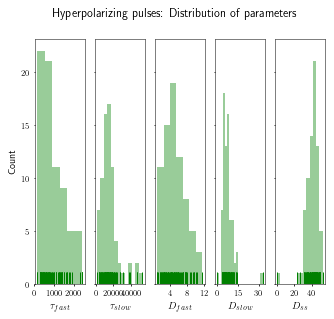

In [12]:
###### Portraying statistics
dt_pool=['DC_current_Group_1','DC_current_Group_2']
df_to_plot = pd.read_pickle("Data/Metadata/ParDistFit_DoubExpon_SpikeAmplitudeDecay_from_"+dt_pool[0]+'_and_'+dt_pool[1]+"_hyperpolPulses_df_to_plot.pkl")

cols_to_plot=df_to_plot.columns[0:5]

dir_figs='/home/contreras/Documents/Project_Adaptation/Gulledge_Experiments/figs/'
fig, axes = plt.subplots(ncols=len(cols_to_plot),sharey=True,facecolor="1",figsize=(fig_wide,fig_height))
for ax, col in zip(axes, df_to_plot[cols_to_plot].columns):
    sns.distplot(df_to_plot[col], ax=ax, rug=True, kde=False, hist=True, norm_hist=False,color='g')
    locatory2 = MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
    ax.xaxis.set_major_locator(locatory2)
    del locatory2


axes[0].set_ylabel('Count')
fig.suptitle('Hyperpolarizing pulses: Distribution of parameters')
fig.show()

print(df_to_plot[cols_to_plot].describe().to_latex())#### To generate latex table of Stat analysis

In [13]:
dt_pool=['40Hz_Group_1', '40Hz_Group_2']
df_Exp_depol = pd.read_pickle("./Data/Metadata/ParDistFit_DoubExpon_SpikeAmplitudeDecay_from_"+dt_pool[0]+'_and_'+dt_pool[1]+"_40Hz_DepolPulses_df_to_plot.pkl")
dt_pool=['DC_current_Group_1','DC_current_Group_2']
df_Exp_hyperpol = pd.read_pickle("./Data/Metadata/ParDistFit_DoubExpon_SpikeAmplitudeDecay_from_"+dt_pool[0]+'_and_'+dt_pool[1]+"_hyperpolPulses_df_to_plot.pkl")

max_num=max(len(list(df_Exp_depol['$\\tau_{slow}$'])),len(list(df_Exp_hyperpol['$\\tau_{slow}$'])))
arr=[]
arr2=[]
for ii in range(max_num):
    try:
        arr.append([list(df_Exp_depol['$\\tau_{slow}$'])[ii],list(df_Exp_hyperpol['$\\tau_{slow}$'])[ii]])
        arr2.append([list(df_Exp_depol['$\\tau_{slow}$'])[ii],list(df_Exp_hyperpol['$\\tau_{slow}$'])[ii]])
    except:
        try:
            arr.append([nan,list(df_Exp_hyperpol['$\\tau_{slow}$'])[ii]])
            arr2.append([nan,list(df_Exp_hyperpol['$\\tau_{slow}$'])[ii]])
        except:
            try:
                arr.append([list(df_Exp_depol['$\\tau_{slow}$'])[ii],nan])
                arr2.append([list(df_Exp_depol['$\\tau_{slow}$'])[ii],nan])
            except:
                pass


### Temporary data filter_weird_measurements
df_raw_data=pd.DataFrame(columns=['$\\tau_{slow}$ 1','$\\tau_{slow}$ 2'], data=arr)
cols_raw = df_raw_data.columns
df_raw_data[cols_raw] = df_raw_data[cols_raw].apply(pd.to_numeric, errors='coerce')

df_raw_data=pd.DataFrame(columns=['$\\tau_{slow}$ '], data=np.concatenate(arr2))
cols_raw = df_raw_data.columns
df_raw_data[cols_raw] = df_raw_data[cols_raw].apply(pd.to_numeric, errors='coerce')

df_raw_data['Protocol'] = pd.Series(['40Hz Depolarizations']*max_num+['Hyperpolarizations']*max_num)

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/lib/python3/dist-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


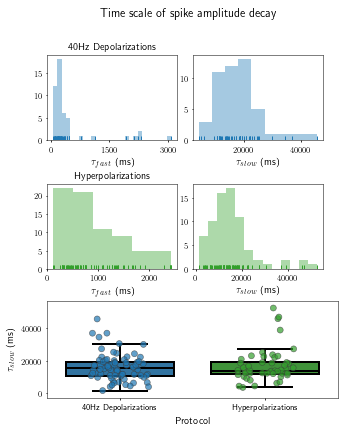

In [14]:
########################
###### Plot distributions
########################

matplotlib.rcParams['lines.linewidth']=0.065
fig_wide=matplotlib.rcParams["figure.figsize"][0]
fig_height=matplotlib.rcParams["figure.figsize"][1]


########################
###### Properties of the figure palette
########################

face_pal = {}
pal = {}
hue_order = []
c=0
for s_icell in list(df_raw_data['Protocol'].unique()):
    if s_icell=='40Hz Depolarizations':
        face_pal[s_icell]=sns.color_palette("Paired")[1]
        pal[s_icell]=sns.color_palette("Paired")[1]
    else:
        face_pal[s_icell]=sns.color_palette("Paired")[3]
        pal[s_icell]=sns.color_palette("Paired")[3]
    hue_order.append(s_icell)
    c+=1
    
boxprops = {'edgecolor': 'k', 'linewidth': 2}
lineprops = {'color': 'k', 'linewidth': 2}
boxplot_kwargs = {'boxprops': boxprops, 'medianprops': lineprops,
                  'whiskerprops': lineprops, 'capprops': lineprops,
                  'width': 0.75, 'palette': face_pal,
                  'hue_order': hue_order}
stripplot_kwargs = {'linewidth': 0.6, 'size': 6, 'alpha': 0.7,
                    'palette': pal, 'hue_order': hue_order}


########################
###### Plot 
########################
f1 = plt.figure(facecolor="1",figsize=(fig_wide,fig_height*1.5))

ax=[]
ax.append(plt.subplot2grid((60, 40), (0, 0), colspan=18, rowspan=14))
ax.append(plt.subplot2grid((60, 40), (0, 20), colspan=18, rowspan=14))
ax.append(plt.subplot2grid((60, 40), (21, 0), colspan=18, rowspan=14))
ax.append(plt.subplot2grid((60, 40), (21, 20), colspan=18, rowspan=14))
ax.append(plt.subplot2grid((60, 40), (40, 0), colspan=40, rowspan=16))

axes = [ax[0],ax[1]]
###### First Graph: 40Hz Depolarizations
for axi, col in zip(axes, df_st[cols_fit].columns[0:2]):
    sns.distplot(df_st[col], ax=axi, rug=True, kde=False, hist=True, norm_hist=False,color=sns.color_palette("Paired")[1])
    locatory2 = MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
    axi.xaxis.set_major_locator(locatory2)
    axi.set_xlabel(col+' (ms)')
    del locatory2
ax[0].set_title('40Hz Depolarizations')



###### Second Graph: Hyperpolarizations
axes = [ax[2],ax[3]]
for axi, col in zip(axes, df_to_plot[cols_to_plot].columns[0:2]):
    sns.distplot(df_to_plot[col], ax=axi, rug=True, kde=False, hist=True, norm_hist=False,color=sns.color_palette("Paired")[3])
    locatory2 = MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
    axi.xaxis.set_major_locator(locatory2)
    del locatory2
    axi.set_xlabel(col+' (ms)')
ax[2].set_title('Hyperpolarizations')
    

###### Third Graph: Comparison
sns.boxplot(x='Protocol', y='$\\tau_{slow}$ ', data=df_raw_data, ax=ax[4],
    fliersize=0, **boxplot_kwargs)
sns.stripplot(x='Protocol', y='$\\tau_{slow}$ ', data=df_raw_data, ax=ax[4],
    split=True, jitter=0.2, **stripplot_kwargs)

str_y=ax[4].get_ylabel()
ax[4].set_ylabel(str_y+' (ms)')

f1.suptitle('Time scale of spike amplitude decay')

f1.show()